In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('batch_corrected_tpm.tsv', sep='\t')
df

,rsem.out.D01_MDDC_Ctrl_0h,rsem.out.D01_MDDC_Ctrl_120h,rsem.out.D01_MDDC_Lps_12h,rsem.out.D01_MDDC_Lps_1h,rsem.out.D01_MDDC_Lps_24h,rsem.out.D01_MDDC_Lps_2h,rsem.out.D01_MDDC_Lps_4h,rsem.out.D01_MDDC_Lps_6h,rsem.out.D09_MDDC_Ctrl_0h,rsem.out.D09_MDDC_Ctrl_120h,...,rsem.out.F33_MDDC_Lps_1h,rsem.out.F33_MDDC_Lps_24h,rsem.out.F33_MDDC_Lps_2h,rsem.out.F33_MDDC_Lps_30m,rsem.out.F33_MDDC_Lps_4h,rsem.out.F33_MDDC_Lps_6h,rsem.out.G40_MDDC_Lps_2h,rsem.out.G40_MDDC_Lps_6h,rsem.out.G41_MDDC_Lps_2h,rsem.out.G41_MDDC_Lps_6h
RPS11,2966.003181,2527.217203,2232.529003,2781.490688,1629.466099,2818.612413,2380.521452,2465.919133,2710.162233,3220.602733,...,2975.042984,1878.622185,2693.793328,2923.381798,2203.596572,2096.296081,2832.544701,1987.454305,2474.734283,2314.386619
ELMO2,24.944727,26.241479,45.047532,20.347192,33.263392,18.344631,31.999284,44.436236,24.502283,36.076469,...,23.163764,31.301492,16.788901,24.070872,34.901587,49.222670,24.843361,33.454842,21.330241,41.851846
PNMA1,22.911707,22.911707,21.881046,21.881046,41.122517,21.881046,21.881046,27.010681,21.057745,18.217202,...,21.636211,36.420088,18.179567,25.073311,20.486331,21.636211,20.666177,28.983175,22.456111,29.381395
MMP2,1.041861,1.041861,1.041861,1.041861,1.041861,1.041861,1.041861,1.041861,2.480635,0.874274,...,2.018865,0.931542,0.931542,0.931542,0.931542,2.018865,2.555164,1.632957,2.003892,2.200302
TRAF3IP2-AS1,2.889639,1.583910,1.583910,2.889639,1.583910,1.583910,2.889639,2.889639,1.652200,1.652200,...,1.627323,1.627323,2.942854,1.627323,4.258908,2.942854,2.356925,3.393431,3.395857,2.253869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PCIF1,19.313654,19.313654,20.733990,14.990989,28.402056,12.788201,10.550735,17.164767,19.900583,19.900583,...,16.108115,24.789572,10.708126,19.358573,11.786081,16.108115,12.606197,21.777373,16.560121,16.560121
PIK3IP1,8.416499,6.804120,2.418235,5.125868,1.429923,4.254408,0.355897,1.429923,9.827003,7.228761,...,3.862856,4.873248,0.883002,8.967542,2.859646,1.865377,2.178233,5.949715,2.339124,4.619712
SNRPD2,96.862861,79.704790,65.813845,82.004761,79.704790,79.704790,44.615771,65.813845,97.180902,92.159707,...,67.981267,78.123978,84.955390,84.955390,64.630326,60.187407,74.418169,67.742037,52.001339,87.492902
SLC39A6,63.113874,67.075910,58.240562,56.584399,107.865091,59.062463,58.240562,49.778744,63.885608,75.226267,...,66.419768,69.119406,66.419768,70.473403,55.739436,50.476137,51.432619,74.394764,61.052326,64.507886


In [3]:
import re
donors = []
for col in df.columns:    
    res = re.findall('.[A-Z][0-9]+_', col)    
    if len(res) == 1:        
        id = res[0][1:-1]
        if id not in donors:
            donors += [id]
print(donors)

['D01', 'D09', 'D10', 'D12', 'D13', 'D14', 'E01', 'E02', 'E81', 'E86', 'E91', 'E94', 'F30', 'F32', 'F33', 'G40', 'G41']


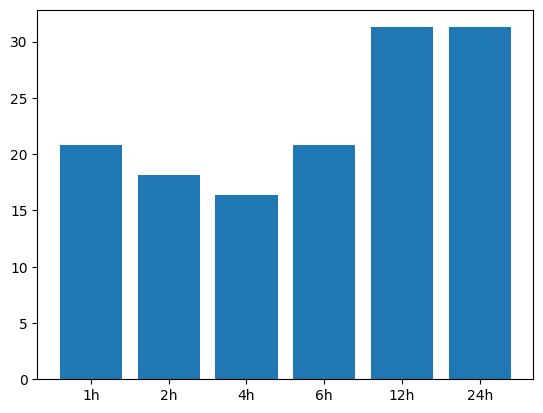

In [4]:
samples = range(1,7)
df_donor = df.filter(regex='D09_MDDC_Lps')
dft = df_donor.transpose()
dft['time'] = dft.index
tstr = dft['time'].str.split('_').str[3].str.replace('h', '')
dft['time'] = tstr.astype(int)
dft.sort_values(by='time', inplace=True)
plt.bar(samples, dft['NF1'])
plt.xticks(range(1,7), ['1h', '2h', '4h', '6h', '12h', '24h'])
plt.savefig("plt.pdf")

In [5]:
obs_times = pd.CategoricalDtype(categories=['30m', '1h', '2h', '4h', '6h', '12h', '24h'], ordered=True)

def get_donor_data(all_data, donor_id):    
    donor_data = all_data.filter(regex=donor_id + '_MDDC_Lps')
    donor_data = donor_data.transpose()    
    idx = donor_data.index.str.split('_') 
    donor_data.index = idx.str[3].astype(obs_times)    
    return donor_data

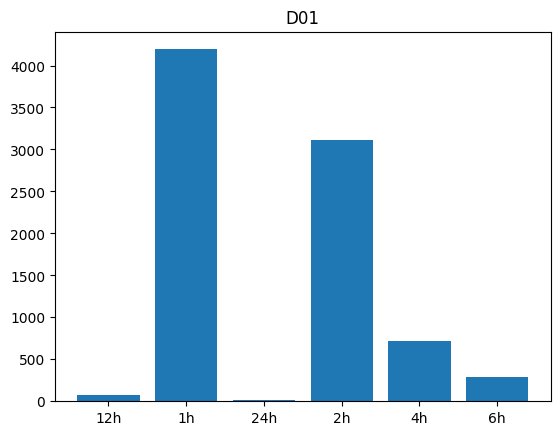

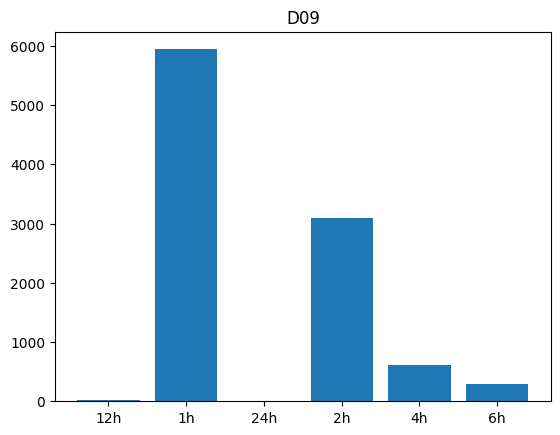

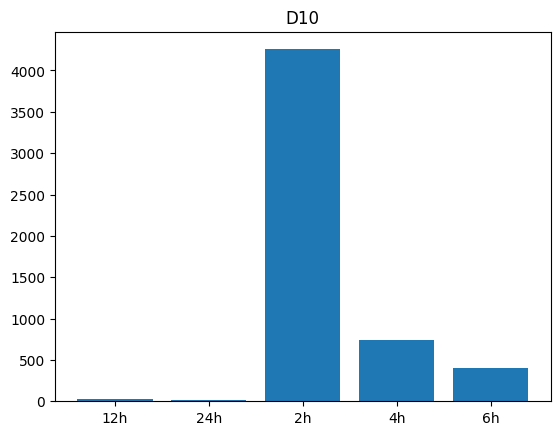

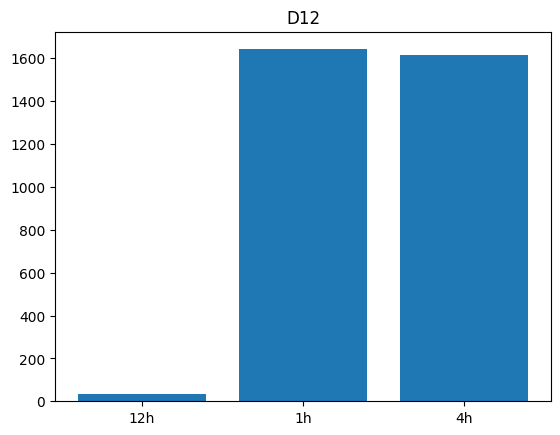

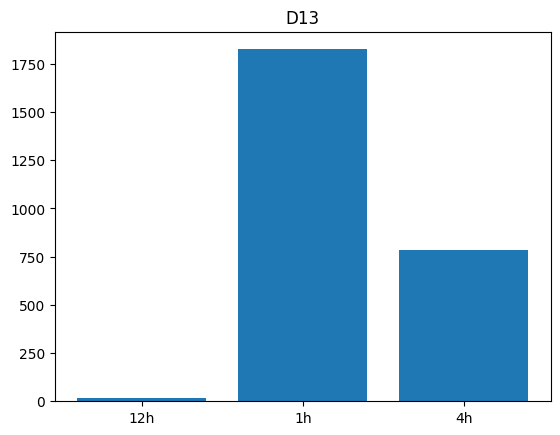

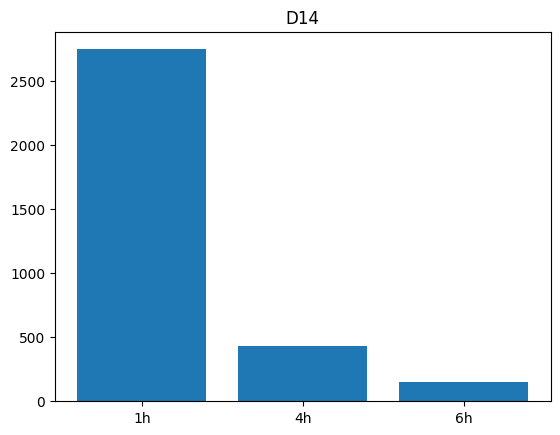

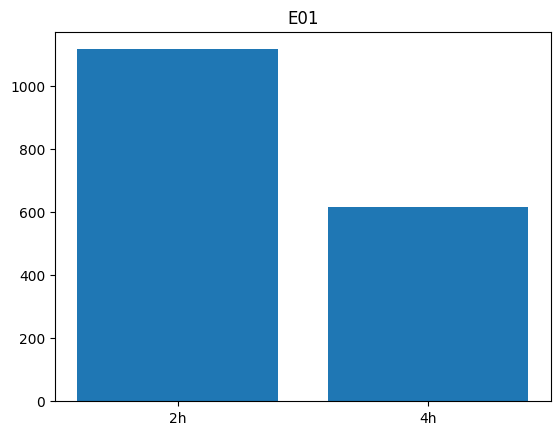

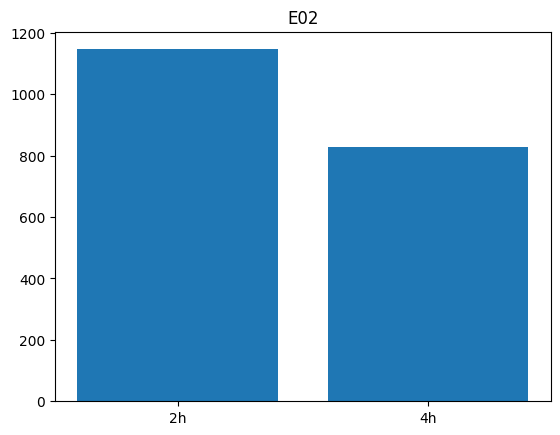

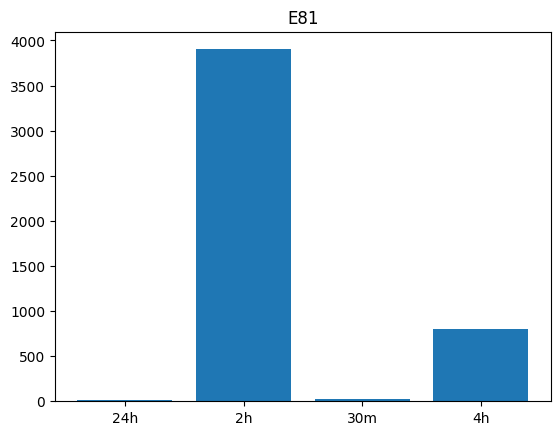

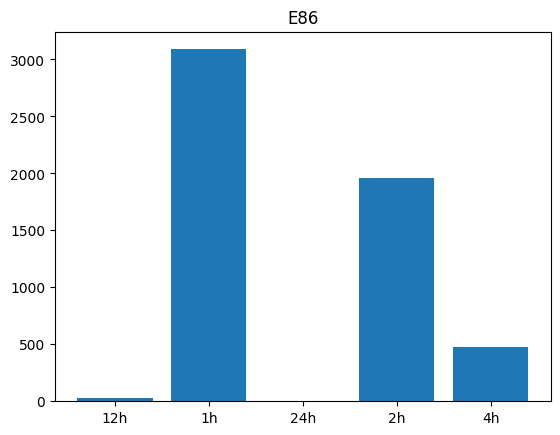

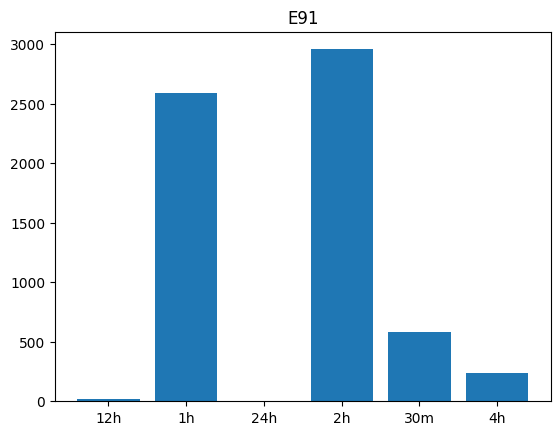

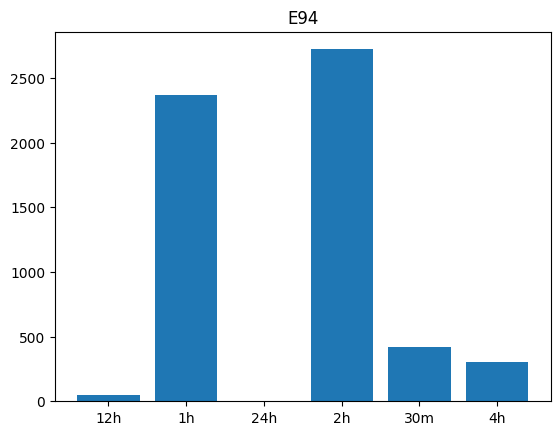

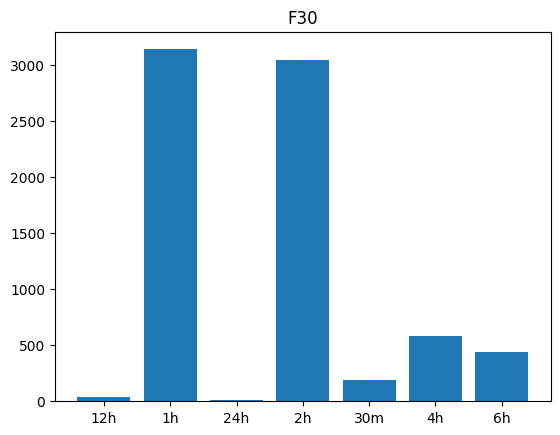

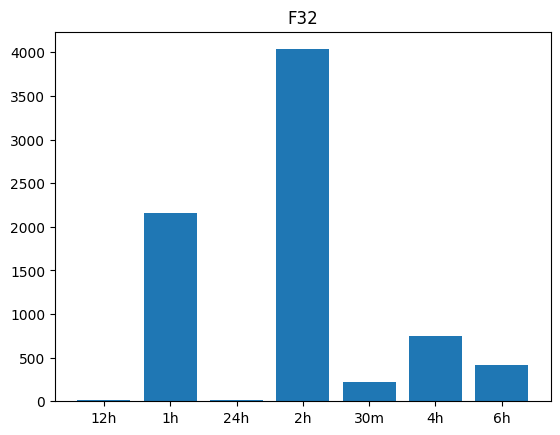

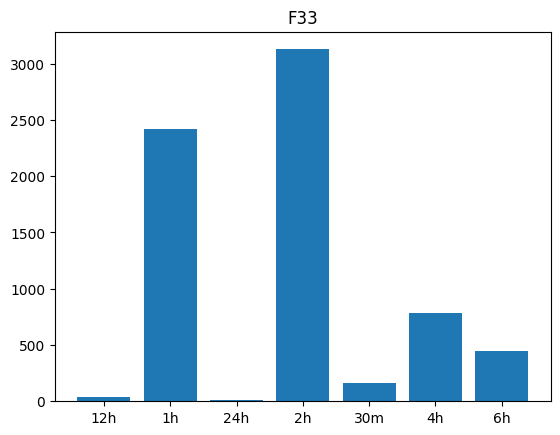

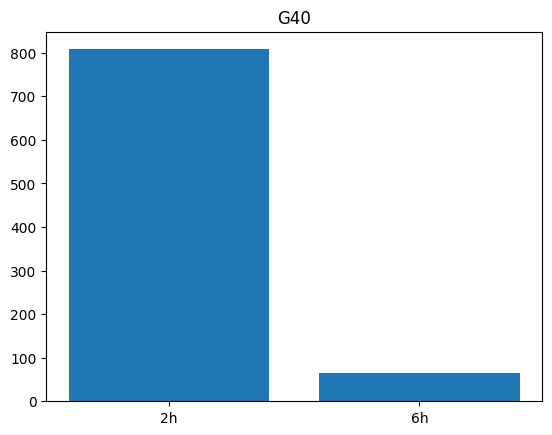

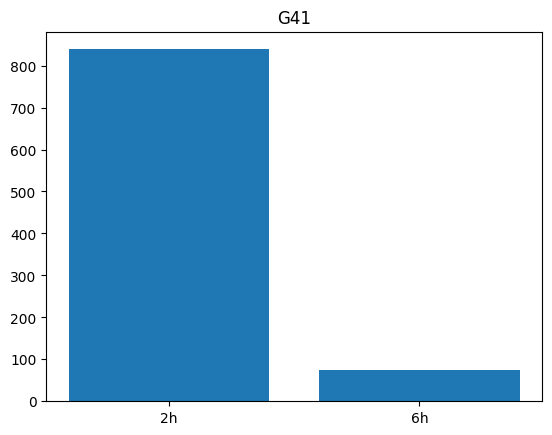

In [6]:
gene = 'TNF'
for id in donors:
    dd = get_donor_data(df, id)
    plt.title(id)
    plt.bar(dd.index, dd[gene])
    plt.show()    

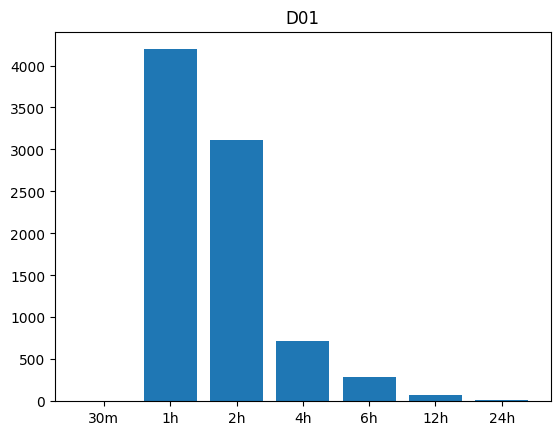

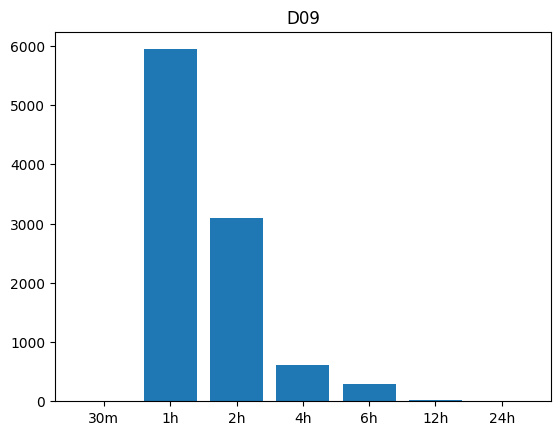

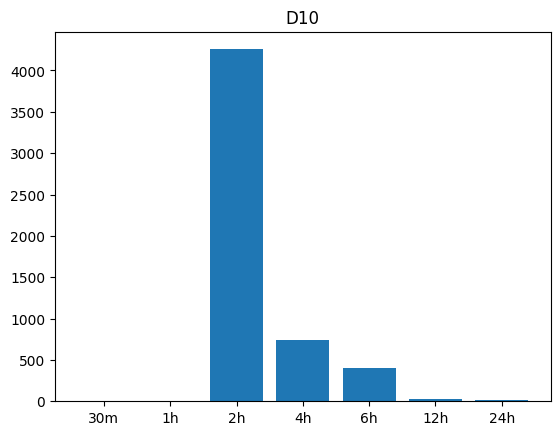

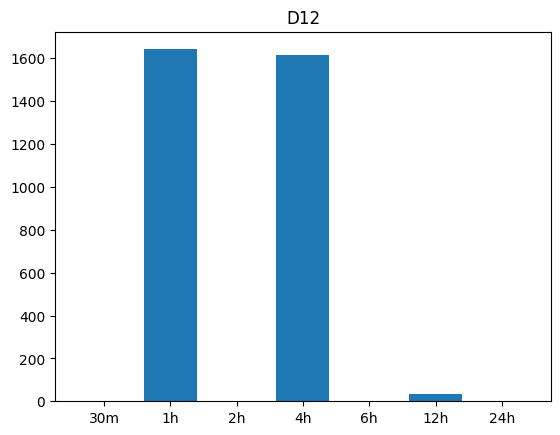

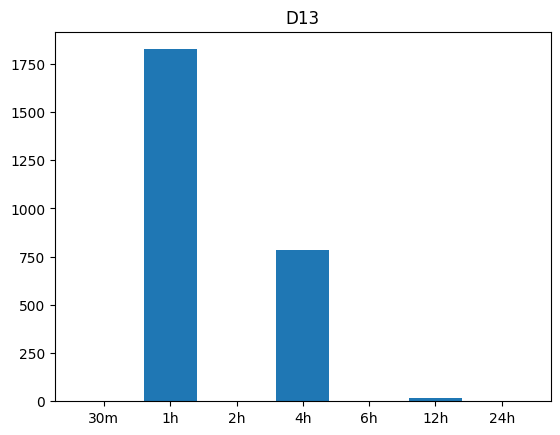

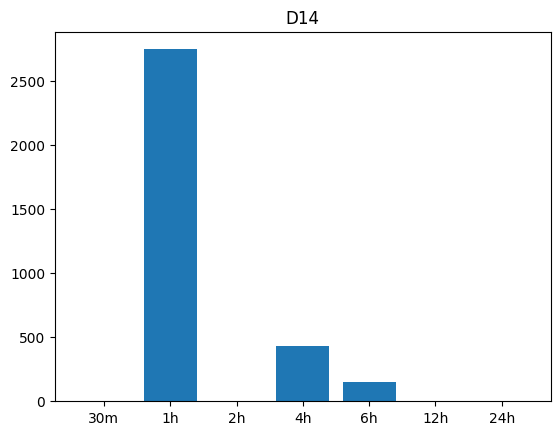

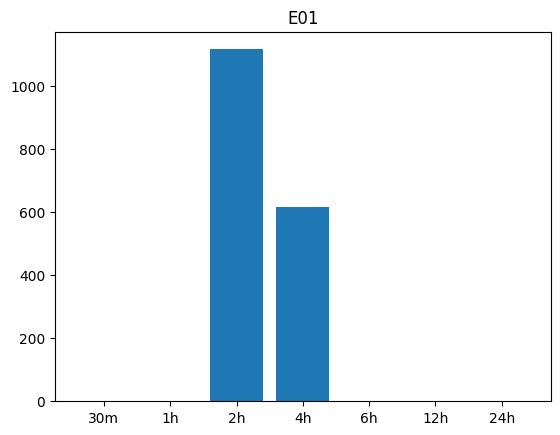

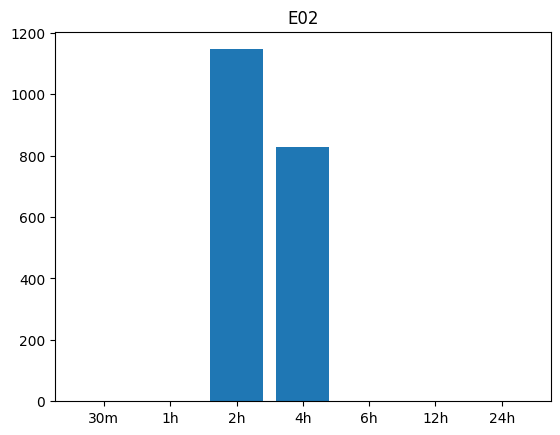

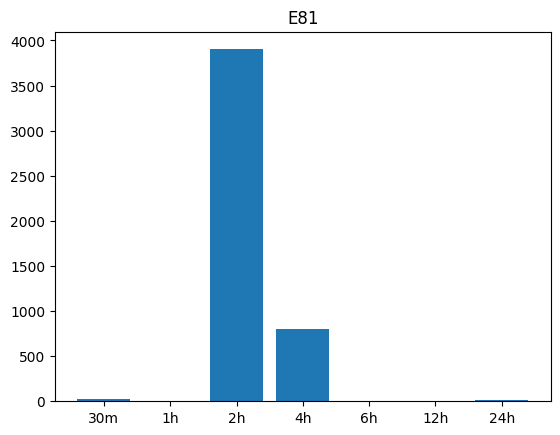

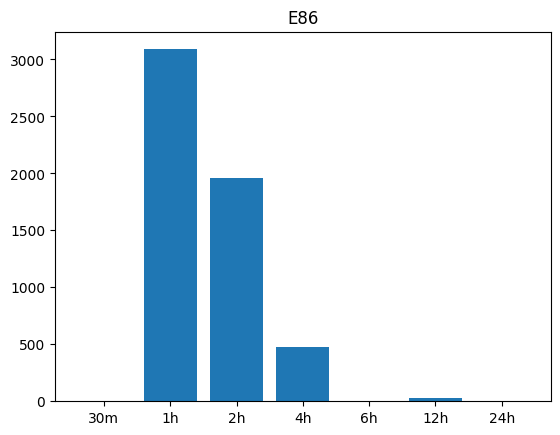

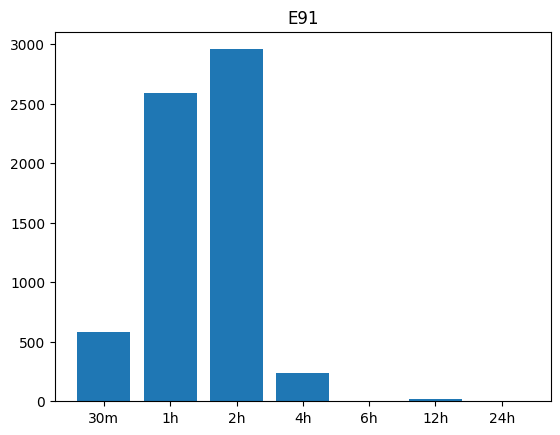

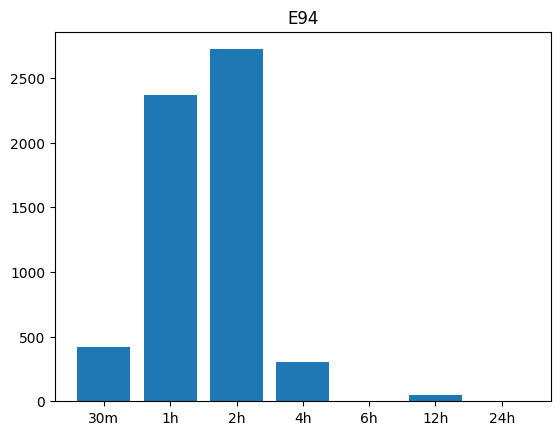

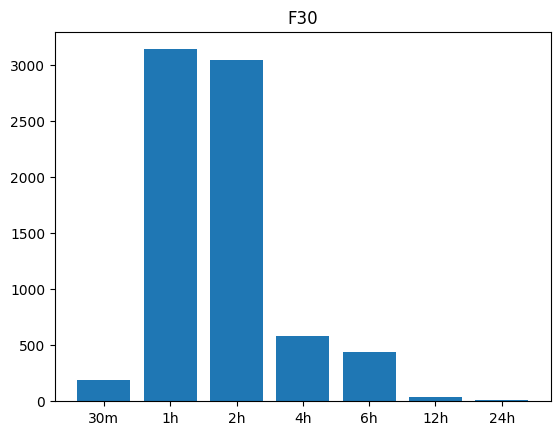

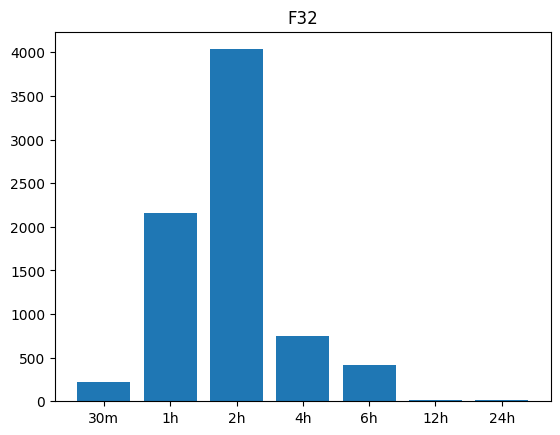

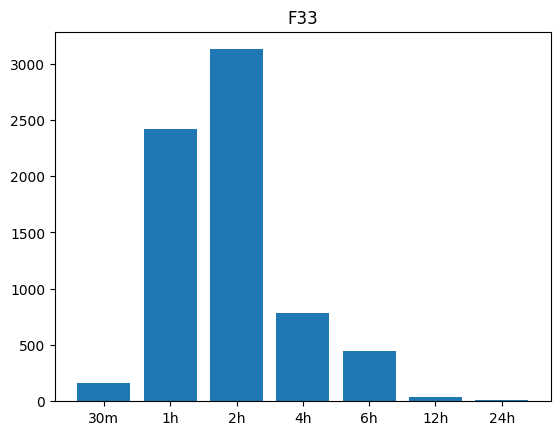

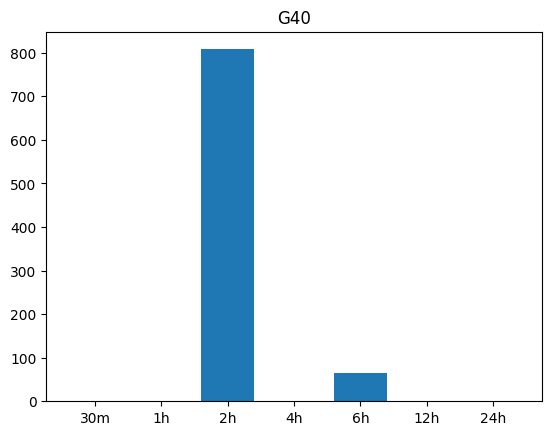

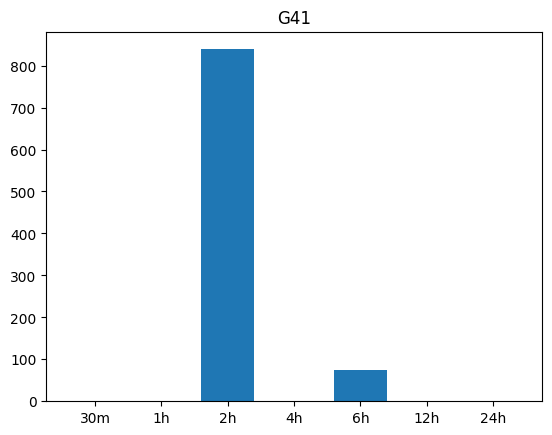

In [7]:
gene = 'TNF'
for id in donors:
    dd = get_donor_data(df, id)    
    values = [dd[gene][v] if v in dd.index else 0 for v in obs_times.categories] 
    plt.title(id)
    plt.bar(obs_times.categories, values)
    plt.show()

In [8]:
expr_values = {}
for obs in obs_times.categories:
    expr_values[obs] = []
print(expr_values)

gene = 'TNF'
for id in donors:
    dd = get_donor_data(df, id)  
    for obs in expr_values:
        if obs in dd.index:            
            expr_values[obs] += [dd[gene][obs]]

for obs in obs_times.categories:
    print('Expression values at', obs, expr_values[obs])

{'30m': [], '1h': [], '2h': [], '4h': [], '6h': [], '12h': [], '24h': []}
Expression values at 30m [25.9875178321635, 583.534011862849, 420.442254717741, 193.997792201739, 222.483233895917, 158.473899137166]
Expression values at 1h [4193.52325304594, 5940.42749834026, 1641.79846371526, 1824.87638313985, 2748.367221973, 3088.71317957544, 2588.60477974256, 2370.24852486151, 3140.71153477713, 2152.61749157619, 2419.35489827892]
Expression values at 2h [3118.09985228189, 3085.02356812052, 4255.95177981043, 1116.81665755495, 1145.78128567276, 3901.4851462259, 1962.8575299495, 2957.93188990036, 2720.96399321605, 3041.27945854371, 4034.12449750559, 3127.22362762817, 807.592025048947, 838.865310906173]
Expression values at 4h [712.233385399757, 619.540099602427, 743.019398884879, 1614.52744824108, 786.043565041238, 431.489498686238, 616.63134567524, 826.426420774049, 798.398532736703, 477.69031134338, 239.440673771852, 300.648440349435, 583.627748688922, 751.121693057979, 785.316005753273]
Exp

{'whiskers': [<matplotlib.lines.Line2D at 0x1244083d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1240a7cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12449a2d0>,
 'medians': [<matplotlib.lines.Line2D at 0x1244df890>,
 'fliers': [<matplotlib.lines.Line2D at 0x1244f0250>,
 'means': []}

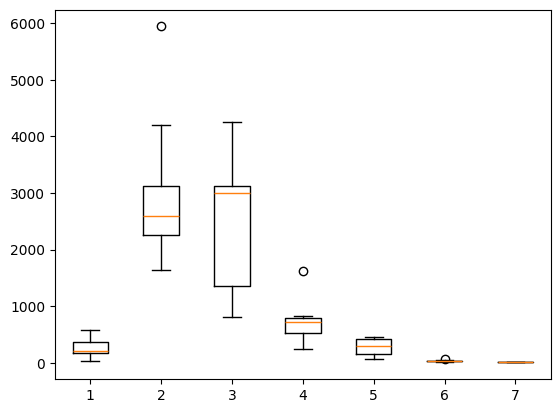

In [9]:
plt.boxplot([expr_values['30m'], expr_values['1h'], expr_values['2h'], expr_values['4h'], expr_values['6h'], expr_values['12h'], expr_values['24h']])

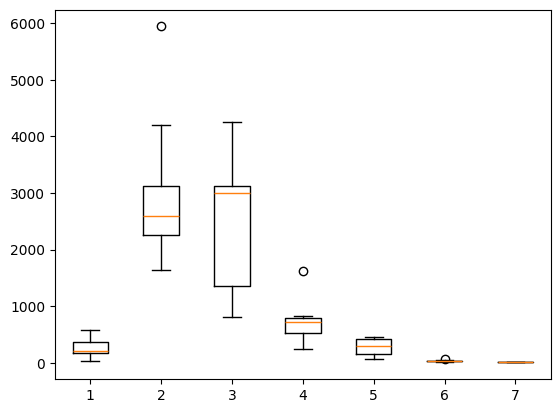

In [10]:
plt.boxplot([expr_values[obs] for obs in obs_times.categories])
plt.savefig("plt.pdf")

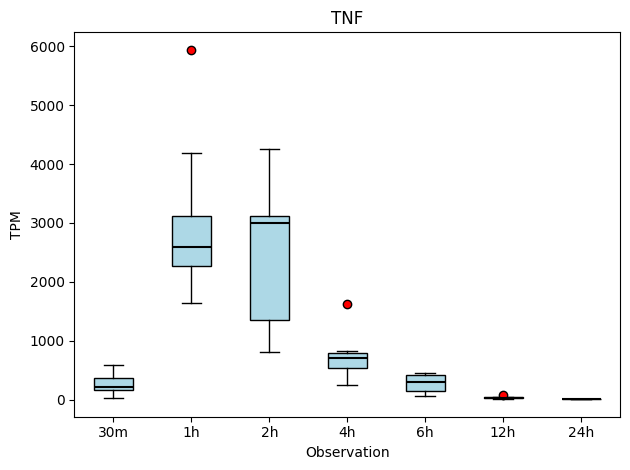

In [11]:
data = [expr_values[obs] for obs in obs_times.categories]
plt.boxplot(data, patch_artist = True, boxprops = dict(facecolor = "lightblue"), medianprops = dict(color = "black", linewidth = 1.5), flierprops = dict(markerfacecolor = "red"))
plt.title('TNF')
plt.xticks(ticks=range(1, len(obs_times.categories) + 1), labels=obs_times.categories)
plt.xlabel('Observation')
plt.ylabel('TPM')
plt.tight_layout()
plt.savefig("plt.pdf")

Text(0.5, 0.98, 'TNF TMPs for 4 donors')

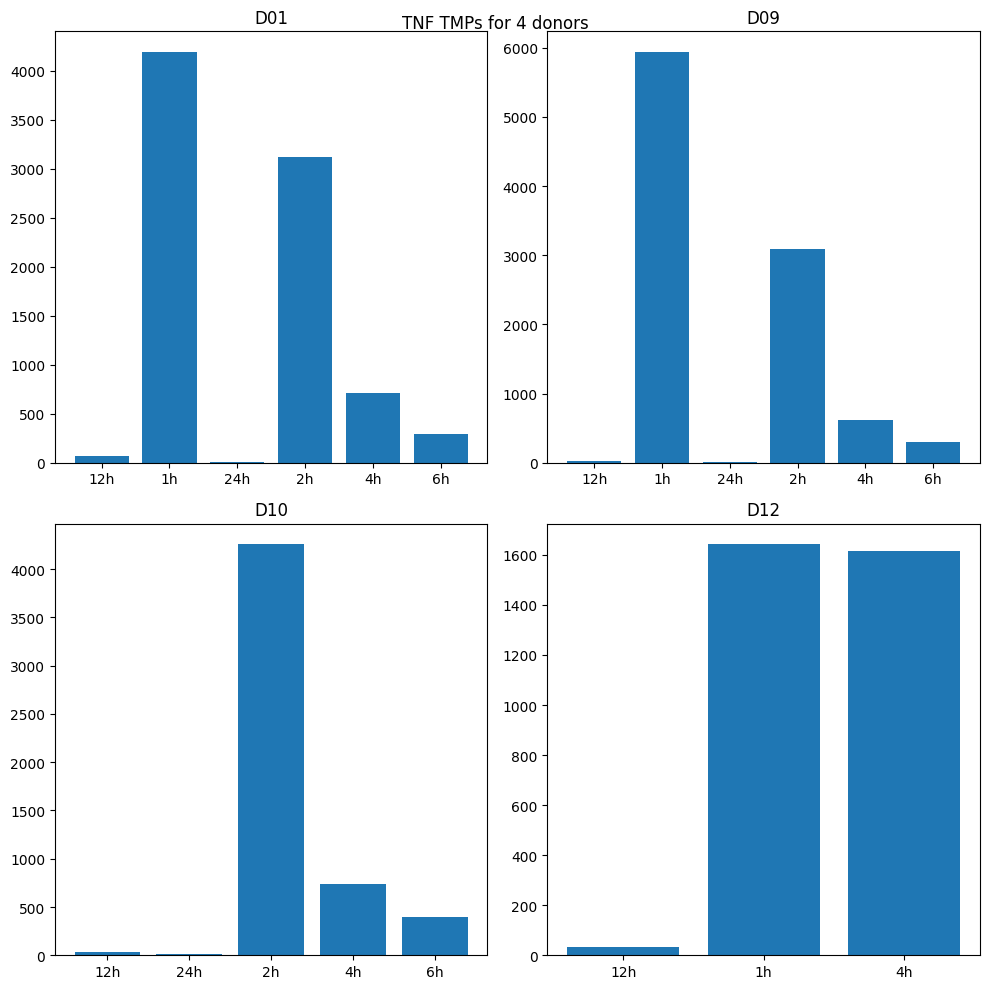

In [18]:
dd01 = get_donor_data(df, 'D01')
dd09 = get_donor_data(df, 'D09')
dd10 = get_donor_data(df, 'D10')
dd12 = get_donor_data(df, 'D12')
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=[10, 10])
axs[0, 0].bar(dd01.index, dd01['TNF'])
axs[0, 0].set_title('D01')
axs[0, 1].bar(dd09.index, dd09['TNF'])
axs[0, 1].set_title('D09')
axs[1, 0].bar(dd10.index, dd10['TNF'])
axs[1, 0].set_title('D10')
axs[1, 1].bar(dd12.index, dd12['TNF'])
axs[1, 1].set_title('D12')
fig.tight_layout()